# Project SIM213 - Geo-blocking and e-commerce in the European Union
### Supervisor: Prof. Lukasz Grzybowski
### Team: Maxime Gaby Bustros and Ruila Puskas-Juhasz


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd
database = pd.read_spss('ZA7554_v1-0-0.sav')

In [3]:
## Enables horizontal scrolling for output windows
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [4]:
# Deep copy to modify
newDatabase = database.copy()

## Clean Database

### Filter question by yes or no if someone uses the internet

In [5]:
newDatabase['d8a'] = newDatabase['d8a'].replace(['Never', 'No Internet access (DO NOT READ OUT)'],'0');
newDatabase['d8a'] = newDatabase['d8a'].replace(['DK/NA (DO NOT READ OUT)', 'Two or three times a month', 'Two or three times a week', 'About once a week', 'Every day or almost every day', 'Less often'], '1')

### Filter question on download or stream content

In [6]:
# Filter q4_1
newDatabase['q4_1'] = newDatabase['q4_1'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_1'] = newDatabase['q4_1'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
newDatabase['q4_1'].fillna('0', inplace = True);
# Filter q4_2
newDatabase['q4_2'] = newDatabase['q4_2'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_2'] = newDatabase['q4_2'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
newDatabase['q4_2'].fillna('0', inplace = True);
# Filter q4_3
newDatabase['q4_3'] = newDatabase['q4_3'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_3'] = newDatabase['q4_3'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
newDatabase['q4_3'].fillna('0', inplace = True);
# Filter q4_4
newDatabase['q4_4'] = newDatabase['q4_4'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_4'] = newDatabase['q4_4'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
newDatabase['q4_4'].fillna('0', inplace = True);
# Filter q4_5
newDatabase['q4_5'] = newDatabase['q4_5'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_5'] = newDatabase['q4_5'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
newDatabase['q4_5'].fillna('0', inplace = True);

In [7]:
newDatabase['q4_2']

0        0
1        0
2        0
3        0
4        0
        ..
26578    0
26579    0
26580    0
26581    0
26582    1
Name: q4_2, Length: 26583, dtype: category
Categories (2, object): [1, 0]

### Replace Male female by female 1 or 0

In [8]:
newDatabase['d2'] = newDatabase['d2'].replace('Male', '0');
newDatabase['d2'] = newDatabase['d2'].replace('Female', '1');

### Replace Phone Ownership by 1/0 instead of Yes/No

In [9]:
newDatabase['d18'] = newDatabase['d18'].replace('Yes', '1');
newDatabase['d18'] = newDatabase['d18'].replace(['No', 'NaN'], '0');
newDatabase['d18'].fillna('0', inplace = True);

### Clean Age Values

In [10]:
newDatabase['d1'] = newDatabase['d1'].replace('98 years', '98');
newDatabase['d1'] = newDatabase['d1'].replace('15 years', '15');

### Replace by bought or not bought for each question

In [11]:
print(newDatabase['q5_1'].unique())

[NaN, Paid per item, Paid a subscription, Free of charge without registration, Free of charge upon registration (including fr..., DK/NA (DO NOT READ OUT)]
Categories (5, object): [Paid per item, Paid a subscription, Free of charge without registration, Free of charge upon registration (including fr..., DK/NA (DO NOT READ OUT)]


In [12]:
newDatabase['q5_1'] = newDatabase['q5_1'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_1'] = newDatabase['q5_1'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');
newDatabase['q5_1'].fillna('0', inplace = True);

newDatabase['q5_2'] = newDatabase['q5_2'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_2'] = newDatabase['q5_2'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');
newDatabase['q5_2'].fillna('0', inplace = True);

newDatabase['q5_3'] = newDatabase['q5_3'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_3'] = newDatabase['q5_3'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');
newDatabase['q5_3'].fillna('0', inplace = True);

newDatabase['q5_4'] = newDatabase['q5_4'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_4'] = newDatabase['q5_4'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');
newDatabase['q5_4'].fillna('0', inplace = True);

newDatabase['q5_5'] = newDatabase['q5_5'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_5'] = newDatabase['q5_5'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');
newDatabase['q5_5'].fillna('0', inplace = True);

In [13]:
newDatabase['q5_1']

0        0
1        0
2        0
3        0
4        0
        ..
26578    0
26579    0
26580    0
26581    0
26582    0
Name: q5_1, Length: 26583, dtype: category
Categories (2, object): [0, 1]

In [14]:
newDatabase['q5_6'] = newDatabase['q5_1'].astype("int64") + newDatabase['q5_2'].astype("int64") + newDatabase['q5_3'].astype("int64") + newDatabase['q5_4'].astype("int64") + newDatabase['q5_5'].astype("int64");
newDatabase['q5_6'] = newDatabase['q5_6'].replace([2,3,4,5],1);

### Filter By Country

In [15]:
entriesByCountry = {};
for i, country in enumerate(newDatabase['tnscntry'].unique()):
    arr = [];
    for entry in newDatabase['tnscntry']:
        if (entry == country):
            arr.append(True);
        else:
            arr.append(False);
    entriesByCountry[country] = newDatabase[arr];
    

In [16]:
# average age, percentage of females asked. Age differences acrosse countries.

### Descriptive Statistics by country

In [17]:
arr = []
for entries in entriesByCountry:
    percentInternetUsers = entriesByCountry[entries]['d8a'].astype("int64").mean() * 100;
    percentOfFemales = entriesByCountry[entries]['d2'].astype("int64").mean() * 100;
    averageAge = entriesByCountry[entries]['d1'].astype('int64').mean();
    averagePhoneOwnership = entriesByCountry[entries]['d18'].astype('float64').mean() * 100;
    percentageOfOnlineCustomers = entriesByCountry[entries]['q5_6'].astype('int64').mean() * 100;
    arr.append([entries, len(entriesByCountry[entries]), round(percentOfFemales,1), round(averageAge,1), round(averagePhoneOwnership,1), round(percentInternetUsers,1), round(percentageOfOnlineCustomers,1)]);
    

df = pd.DataFrame(arr, columns=['Country', 'Nb of Respondents','% of Females Asked', 'Average Age', '% Who own a phone', '% of People who use the Internet','% of People who buy Online']);

# Add mean
mean = ['avg value', round(df['Nb of Respondents'].mean(),1), round(df['% of Females Asked'].mean(),1), round(df['Average Age'].mean(),1), round(df['% Who own a phone'].mean(),1), round(df['% of People who use the Internet'].mean(),1), round(df['% of People who buy Online'].mean(),1)];
df.loc[len(df)] = mean;

std = ['std of values', round(df['Nb of Respondents'].std(),1), round(df['% of Females Asked'].std(),1), round(df['Average Age'].std(),1), round(df['% Who own a phone'].std(),1), round(df['% of People who use the Internet'].std(),1), round(df['% of People who buy Online'].std(),1)];
df.loc[len(df)] = std;

In [18]:
#temporaly set expand_frame_repr
with pd.option_context('expand_frame_repr', False):
    print(df.to_string(index=False))

            Country  Nb of Respondents  % of Females Asked  Average Age  % Who own a phone  % of People who use the Internet  % of People who buy Online
           BELGIQUE             1010.0                54.6         57.7               61.5                              81.6                        22.3
            DANMARK             1002.0                51.7         57.2               26.7                              91.2                        46.3
             ELLADA             1004.0                51.9         50.5               60.0                              84.0                        13.1
             ESPANA             1000.0                51.8         50.2               43.9                              87.2                        26.1
              SUOMI             1002.0                42.7         58.5                0.0                              85.1                        30.4
             FRANCE             1006.0                54.6         58.8           

In [19]:
print('Country with highest average age');
d1 = df.iloc[df['Average Age'].idxmax()];
print(d1['Country'], d1['Average Age']);
print();

print('Country with highest % of Phone Owners');
d2 = df.iloc[df['% Who own a phone'].idxmax()];
print(d2['Country'], d2['% Who own a phone']);
print();

print('Country with highest % of internet Users');
d3 = df.iloc[df['% of People who use the Internet'].idxmax()]
print(d3['Country'], d3['% of People who use the Internet']);
print();

print('Country with highest % of Online customers');
d4 = df.iloc[df['% of People who buy Online'].idxmax()]
print(d4['Country'], d4['% of People who buy Online']);
print();

Country with highest average age
SVERIGE 62.1

Country with highest % of Phone Owners
DEUTSCHLAND 70.3

Country with highest % of internet Users
LUXEMBOURG 97.0

Country with highest % of Online customers
LUXEMBOURG 52.2



### Bar chart showing internet usage per country

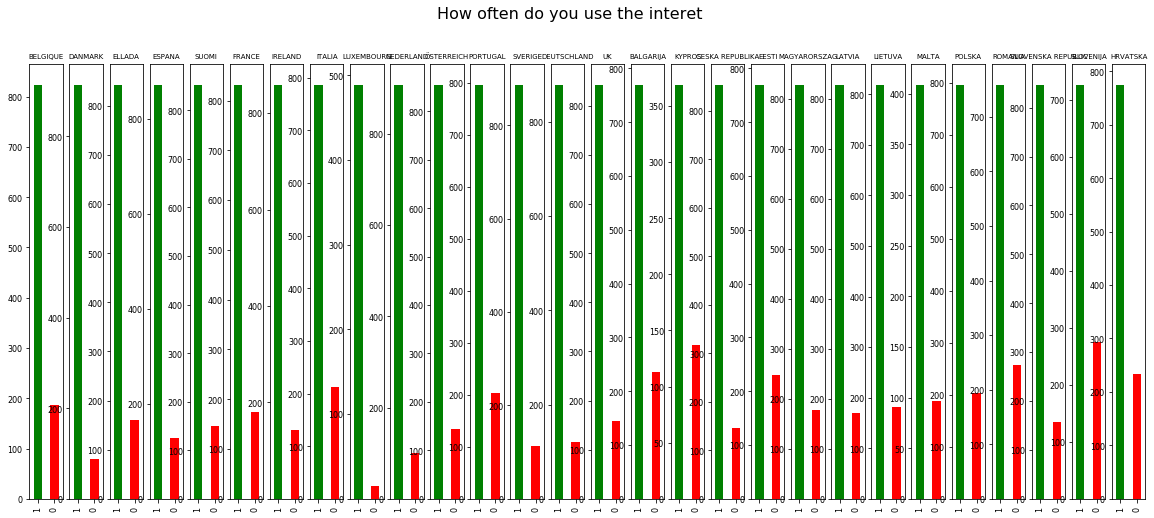

In [20]:
fig = plt.figure()
fig.suptitle('How often do you use the interet', fontsize=16)
subplots = {}
for index, country in enumerate(entriesByCountry):
    entries = entriesByCountry[country];
    barfreq = entries['d8a'].value_counts();
    subplots[country] = plt.subplot(1, 28, index+1);
    subplots[country].set_title(country, size=7)
    barfreq.plot.bar(fontsize=8, ax=subplots[country], figsize=(20,8), color=['green', 'red']);

### Filter By Age Bracket

In [21]:
entriesByAgeBracket = {};

under20arr = []
over20under40arr = []
over40under65arr = []
over65arr = [];

for i, entry in enumerate(newDatabase['d1']):
    floatv = float(entry)
    if (floatv < 20):
        under20arr.append(newDatabase.iloc[i]);
    elif (floatv < 40):
        over20under40arr.append(newDatabase.iloc[i]);
    elif (floatv < 65):
        over40under65arr.append(newDatabase.iloc[i]);
    else:
        over65arr.append(newDatabase.iloc[i]);
        
entriesByAgeBracket['under20'] = pd.DataFrame(under20arr)
entriesByAgeBracket['over20under40'] = pd.DataFrame(over20under40arr)
entriesByAgeBracket['over40under65'] = pd.DataFrame(over40under65arr)
entriesByAgeBracket['over65'] = pd.DataFrame(over65arr)

### Descriptive statistics by age bracket

In [22]:
arr = []
for entries in entriesByAgeBracket:
    percentInternetUsers = entriesByAgeBracket[entries]['d8a'].astype("int64").mean() * 100;
    percentOfFemales = entriesByAgeBracket[entries]['d2'].astype("int64").mean() * 100;
    averageAge = entriesByAgeBracket[entries]['d1'].astype('int64').mean();
    averagePhoneOwnership = entriesByAgeBracket[entries]['d18'].astype('float64').mean() * 100;
    percentageOfOnlineCustomers = entriesByAgeBracket[entries]['q5_6'].astype('int64').mean() * 100;
    arr.append([entries, len(entriesByAgeBracket[entries]), round(percentOfFemales,1), round(averageAge,1), round(averagePhoneOwnership,1), round(percentInternetUsers,1), round(percentageOfOnlineCustomers,1)]);
    

df = pd.DataFrame(arr, columns=['AgeBracket', 'Nb of Respondents','% of Females Asked', 'Average Age', '% Who own a phone', '% of People who use the Internet','% of People who buy Online']);

# Add mean
mean = ['avg value', round(df['Nb of Respondents'].mean(),1), round(df['% of Females Asked'].mean(),1), round(df['Average Age'].mean(),1), round(df['% Who own a phone'].mean(),1), round(df['% of People who use the Internet'].mean(),1), round(df['% of People who buy Online'].mean(),1)];
df.loc[len(df)] = mean;

std = ['std of values', round(df['Nb of Respondents'].std(),1), round(df['% of Females Asked'].std(),1), round(df['Average Age'].std(),1), round(df['% Who own a phone'].std(),1), round(df['% of People who use the Internet'].std(),1), round(df['% of People who buy Online'].std(),1)];
df.loc[len(df)] = std;

In [23]:
#temporaly set expand_frame_repr
with pd.option_context('expand_frame_repr', False):
    print(df.to_string(index=False))

    AgeBracket  Nb of Respondents  % of Females Asked  Average Age  % Who own a phone  % of People who use the Internet  % of People who buy Online
       under20              606.0                44.2         17.5               32.2                              99.7                        54.8
 over20under40             4909.0                48.3         31.1               20.6                              99.1                        39.9
 over40under65            12077.0                53.7         52.7               40.2                              91.4                        23.7
        over65             8991.0                57.8         73.6               51.9                              61.0                         7.8
     avg value             6645.8                51.0         43.7               36.2                              87.8                        31.5
 std of values             4315.5                 5.2         21.3               11.4                           

In [ ]:
    percentInternetUsers = entriesByCountry[entries]['d8a'].astype("int64").mean() * 100;
    percentOfFemales = entriesByCountry[entries]['d2'].astype("int64").mean() * 100;
    averageAge = entriesByCountry[entries]['d1'].astype('int64').mean();
    averagePhoneOwnership = entriesByCountry[entries]['d18'].astype('float64').mean() * 100;
    percentageOfOnlineCustomers = entriesByCountry[entries]['q5_6']

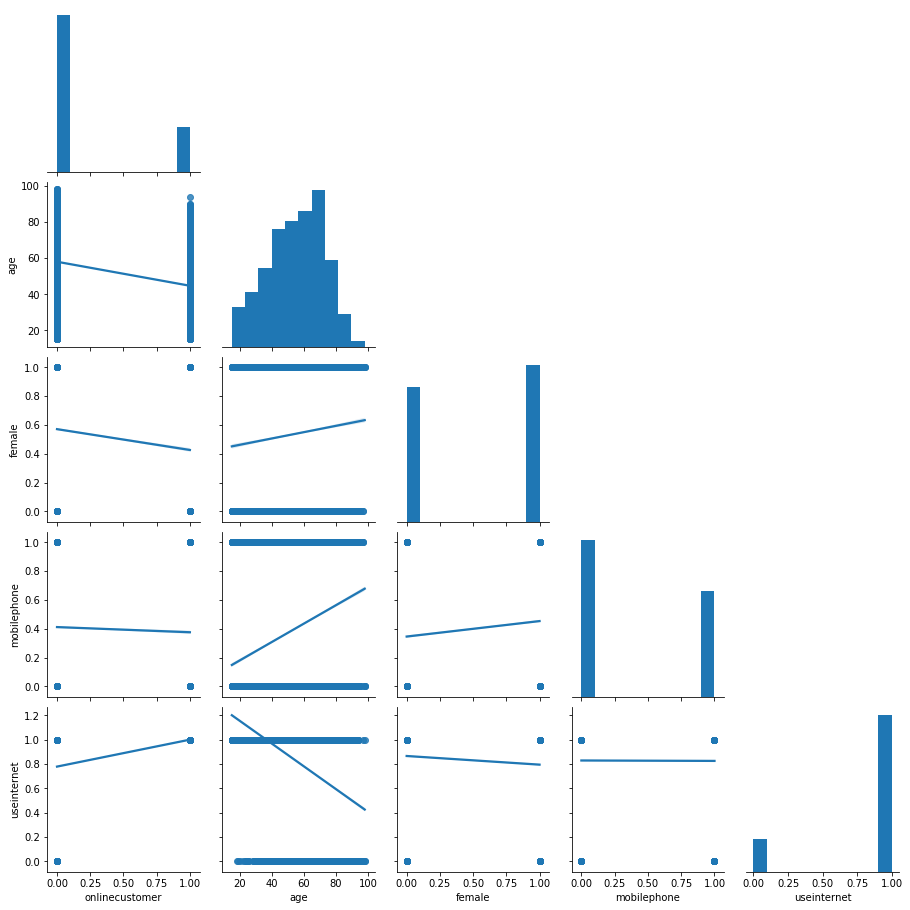

In [38]:
# pair plot
newDatabase['useinternet'] = newDatabase['d8a'].astype('int32');
newDatabase['female'] = newDatabase['d2'].astype('int32');
newDatabase['age'] = newDatabase['d1'].astype('int32');
newDatabase['mobilephone'] = newDatabase['d18'].astype('int32');
newDatabase['onlinecustomer'] = newDatabase['q5_6'].astype('int32');
correlation_data = newDatabase[["onlinecustomer", "age", "female", "mobilephone", "useinternet"]] 
sns.pairplot(correlation_data, kind="reg", corner=True) 
plt.show()

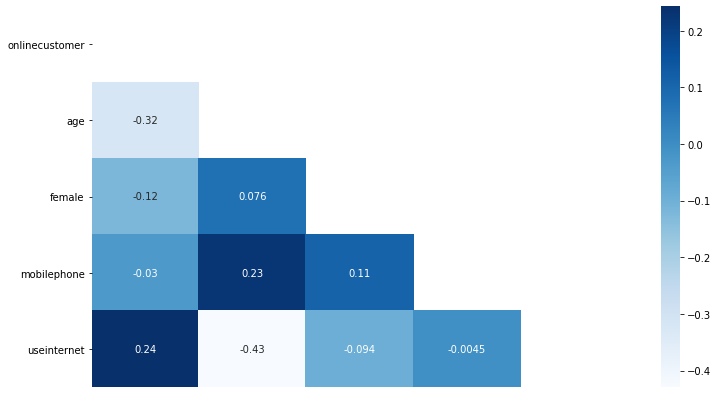

In [39]:
# Correlation matrix 
corr = correlation_data.corr() 
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(12,7)) 
sns.heatmap(corr, annot=True, mask=mask, cmap="Blues", xticklabels=False) 
plt.show()
# ["onlinecustomer", "age", "female", "mobilephone", "useinternet"]

### Descriptive statistics by age bracket

In [24]:
ax = pieFreq.plot.bar(title = 'Do you buy often online?', figsize=(10,10), color=['green'])
ax.get_children()[0].set_color('r')
ax.get_children()[1].set_color('orange')
ax.get_children()[2].set_color('g')
ax.get_children()[3].set_color('y')

NameError: name 'pieFreq' is not defined

In [43]:
arr = [];
for entries in entriesByAgeBracket:
    internetCount = 0;
    totalCount = len(entriesByAgeBracket[entries]);
    for entry in entriesByAgeBracket[entries]['d8a']:
        if (entry == 'Yes'):
            internetCount += 1;
    percentInternetUsers = internetCount / totalCount;
    percentOnlineBuyers = 0;
    arr.append([percentInternetUsers, percentOnlineBuyers]);
    
df = pd.DataFrame(arr, columns=['% of people who use the internet','% of people who buy online']);

In [ ]:
print(df)

In [ ]:
#Use table rather than graph. average age, percentage of females asked. Age differences acrosse countries. 
#bar chart to use
pieFreq = newDatabase['d20'].value_counts()
pieFreq.plot.pie(title = 'Do you buy online?', figsize=(10,10))

In [ ]:
pieDownload_Stream_music = newDatabase['q4_1'].value_counts();
pieDownload_Stream_sports = newDatabase['q4_2'].value_counts()
pieDownload_Stream_audiovis = newDatabase['q4_3'].value_counts();
pieDownload_Stream_ebooks = newDatabase['q4_4'].value_counts();
pieDownload_Stream_gaming = newDatabase['q4_5'].value_counts();

fig = plt.figure()
fig.suptitle('How often do you use the interet to', fontsize=16)
q4_1 = plt.subplot(321);
q4_2 = plt.subplot(322);
q4_3 = plt.subplot(323);
q4_4 = plt.subplot(324);
q4_5 = plt.subplot(325);

q4_1 = pieDownload_Stream_music.plot.pie(title = 'Download or stream Music?', ax=q4_1, figsize=(10,10));
q4_2 = pieDownload_Stream_sports.plot.pie(title = 'Download or stream Sports?', ax=q4_2, figsize=(10,10));
q4_3 = pieDownload_Stream_audiovis.plot.pie(title = 'Download or stream Audiovisual Content?', ax=q4_3, figsize=(10,10));
q4_4 = pieDownload_Stream_ebooks.plot.pie(title = 'Download or stream Ebooks?', ax=q4_4, figsize=(10,10));
q4_5 = pieDownload_Stream_gaming.plot.pie(title = 'Download or stream games?', ax=q4_5, figsize=(10,10));

In [ ]:
pieFreq = database['d8a'].value_counts()
pieFreq.plot.pie(title = 'How often do you use the internet?', figsize=(10,10))

In [ ]:
#pieDownload_Stream_music = database['q4.1'].value_counts()
#pieDownload_Stream_music.plot.pie(title = 'How often did you use the internet do download or stream Music?', figsize=(10,10))
#
#
#pieDownload_Stream_sports = database['d8b'].value_counts()
#pieDownload_Stream_sports.plot.pie(title = 'How often did you use the internet do download or stream sports?', figsize=(10,10))
#
#
#pieDownload_Stream_audiovis = database['d8c'].value_counts()
#pieDownload_Stream_audiovis.plot.pie(title = 'How often did you use the internet do download or stream audio visual content?', figsize=(10,10))
#
#
#pieDownload_Stream_ebooks = database['d8d'].value_counts()
#pieDownload_Stream_ebooks.plot.pie(title = 'How often did you use the internet do download or stream ebooks?', figsize=(10,10))
#
#pieDownload_Stream_gaming = database['d8e'].value_counts()
#pieDownload_Stream_gaming.plot.pie(title = 'How often did you use the internet do download or stream gaming apps?', figsize=(10,10))
#

keys= database.keys();
[print(a) for a in keys]

In [ ]:
##Categorization in function of cultural proximity
## Geographical boundaries
The modern physical geographic regions of Europe, include:

Central_Europe
Eastern Europe
Northeastern Europe
Northern_Europe
Northwestern_Europe
Southeastern_Europe
Southern Europe
Southwestern Europe
Western Europe


In [ ]:
piePayment_Stream_music = database['q5_1'].value_counts();
piePayment_Stream_sports = database['q5_2'].value_counts()
piePayment_Stream_audiovis = database['q5_3'].value_counts();
piePayment_Stream_ebooks = database['q5_4'].value_counts();
piePayment_Stream_gaming = database['q5_5'].value_counts();

fig = plt.figure()
fig.suptitle('Payement for accessed of content', fontsize=16)
q5_1 = plt.subplot(321);
q5_2 = plt.subplot(322);
q5_3 = plt.subplot(323);
q5_4 = plt.subplot(324);
q5_5 = plt.subplot(325);

q5_1 = piePayment_Stream_music.plot.pie(title = 'Download or stream Music?', ax=q5_1, figsize=(10,10));
q5_2 = piePayment_Stream_sports.plot.pie(title = 'Download or stream Sports?', ax=q5_2, figsize=(10,10));
q5_3 = piePayment_Stream_audiovis.plot.pie(title = 'Download or stream Audiovisual Content?', ax=q5_3, figsize=(10,10));
q5_4 = piePayment_Stream_ebooks.plot.pie(title = 'Download or stream Ebooks?', ax=q5_4, figsize=(10,10));
q5_5 = piePayment_Stream_gaming.plot.pie(title = 'Download or stream games?', ax=q5_5, figsize=(10,10));

In [ ]:
piePayment_Stream_music = database['q6.1'].value_counts();
piePayment_Stream_sports = database['q6.2'].value_counts()
piePayment_Stream_audiovis = database['q6.3'].value_counts();
piePayment_Stream_ebooks = database['q6.4'].value_counts();
piePayment_Stream_gaming = database['q6.5'].value_counts();

fig = plt.figure()
fig.suptitle('Reasons', fontsize=16)
q6_1 = plt.subplot(321);
q6_2 = plt.subplot(322);
q6_3 = plt.subplot(323);
q6_4 = plt.subplot(324);
q6_5 = plt.subplot(325);

q6_1 = piePayment_Stream_music.plot.pie(title = 'Download or stream Music?', ax=q6_1, figsize=(10,10));
q6_2 = piePayment_Stream_sports.plot.pie(title = 'Download or stream Sports?', ax=q6_2, figsize=(10,10));
q6_3 = piePayment_Stream_audiovis.plot.pie(title = 'Download or stream Audiovisual Content?', ax=q6_3, figsize=(10,10));
q6_4 = piePayment_Stream_ebooks.plot.pie(title = 'Download or stream Ebooks?', ax=q6_4, figsize=(10,10));
q6_5 = piePayment_Stream_gaming.plot.pie(title = 'Download or stream games?', ax=q6_5, figsize=(10,10));

In [ ]:
piePossibility1 = database['d9'].value_counts()
piePossibility1.plot.pie(title = 'Are you aware of geo-blocking being waived?', figsize=(10,10))

In [ ]:
piePossibility2 = database['d10'].value_counts()
piePossibility2.plot.pie(title = 'Do you know you can purchase online?', figsize=(10,10))